# 批訓練
目的：提升訓練模型的效率

[來源解釋](https://ithelp.ithome.com.tw/articles/10219945)



1.   Epoch(一代訓練) ：使用訓練資料集的全部數據進行一次訓練
2.   Batch(一批數據) ：使用訓練資料集的一小部分對模型進行一次反向更新
3.   Iteration(一次訓練)  ：使用一個Batch的數據進行一次參數更新的過程





In [ ]:
import torch
import torch.utils.data as Data

## Batch = 5 每次只取5筆資料進行更新

In [ ]:
BATCH_SIZE=5

## 建立數據

In [ ]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)

## 資料放入Batch中
[詳細參數設定](https://zhuanlan.zhihu.com/p/117270644)

In [ ]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,           # random shuffle for training
    num_workers=2,          # subprocesses for loading data 提取出數據時，是用兩個進程來提取
)

# 建立神經網路

In [ ]:
net1 = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1)
)

# 訓練神經網路

In [ ]:
optimizer = torch.optim.SGD(net1.parameters(),lr=0.3)
loss_func = torch.nn.MSELoss()
#訓練3*[(20=100/5)*5]筆資料
for epoch in range(3):   # train entire dataset 3 times
      for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
            prediction = net1(batch_x)
            loss = loss_func(prediction,batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',batch_x.numpy(), '| batch y: ', batch_y.numpy())

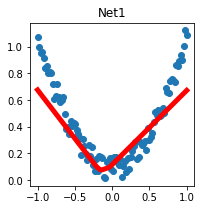

In [ ]:
import matplotlib.pyplot as plt
prediction = net1(x)
plt.figure(1, figsize=(10, 3))
plt.subplot(131)
plt.title('Net1')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

# 使用批訓練建模的MSE和100次全建模比較

In [ ]:
#計算MSE
prediction = net1(x)
#prediction.detach().numpy() 預測
#y.detach().numpy()      Ans

### 批建模MSE

In [ ]:
def MSE_calculate(list1,list2):
    MSE=0
    for i in range(len(list1)):
        MSE=MSE+(list1[i]-list2[i])**2
    return MSE

In [ ]:
MSE_calculate(y.detach().numpy(),prediction.detach().numpy())

array([2.5598874], dtype=float32)

# 用上次的NN試試比較結果

In [ ]:
net2 = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1)
)
optimizer = torch.optim.SGD(net2.parameters(),lr=0.3)
loss_func = torch.nn.MSELoss()
#訓練3*[(20=100/5)*5]筆資料
for epoch in range(10000):   # train entire dataset 3 times
  prediction = net2(x)
  loss = loss_func(prediction,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

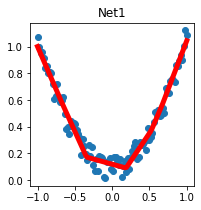

In [ ]:
prediction = net2(x)
plt.figure(1, figsize=(10, 3))
plt.subplot(131)
plt.title('Net1')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [ ]:
prediction = net2(x)
MSE_calculate(y.detach().numpy(),prediction.detach().numpy())

array([0.2867266], dtype=float32)